## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [16]:
#importing everything that is important
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

#importing the datasets
imd_shp = 'C:/Users/maaik/Downloads/lab-04/data/IMD/IMD/lab04_imd.shp'
lookup_path = 'C:/Users/maaik/Downloads/lab-04/data/IMD/IMD/OAs'



For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BU_CODE     481 non-null    object  
 1   JRSTATCODE  481 non-null    object  
 2   BU_NAAM     479 non-null    object  
 3   GM_CODE     481 non-null    object  
 4   GM_NAAM     481 non-null    object  
 5   IND_WBI     481 non-null    int64   
 6   H2O         481 non-null    object  
 7   POSTCODE    479 non-null    object  
 8   DEK_PERC    481 non-null    int64   
 9   OAD         481 non-null    int64   
 10  STED        481 non-null    int64   
 11  BEV_DICHTH  481 non-null    int64   
 12  AANT_INW    481 non-null    int64   
 13  AANT_MAN    481 non-null    int64   
 14  AANT_VROUW  481 non-null    int64   
 15  P_00_14_JR  481 non-null    int64   
 16  P_15_24_JR  481 non-null    int64   
 17  P_25_44_JR  481 non-null    int64   
 18  P_45_64_JR  481 non-null    int64   
 19  

c:\Users\maaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


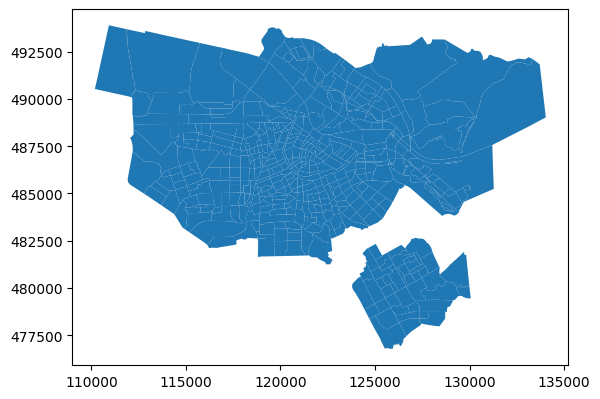

In [11]:
#importing everything that is important
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

# Standard things of our dataset
imd_shp = 'C:/Users/maaik/Downloads/lab-04/data/IMD/IMD/Amsterdam data/adam_neighbourhoods2020.shp' #import the data file from my laptop
imd = gpd.read_file(imd_shp) #the next few lines read and show the data file
imd.info()
imd.plot()


In [13]:
#question 1 All

imd.head() #wanted to see the first few lines of the table to get some info about BU_CODE (neighborhood code)

w_queen = weights.Queen.from_dataframe(imd, ids="BU_CODE")  #we took the variable BU_CODE as the criteria for queen
w_queen

w_queen['BU03630001'] #we tested to see if it worked for a random value of BU_CODE

c:\Users\maaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


{'BU03630000': 1.0,
 'BU03630004': 1.0,
 'BU03630104': 1.0,
 'BU03630102': 1.0,
 'BU03630003': 1.0,
 'BU03630002': 1.0}

In [21]:
# Question 2 - Caya
mi = esda.Moran(imd['OPP_LAND'], w_queen) #To calculate the I, we use the function from the lab, as the attribute array we chose OPP_LAND (surface area), and for the w, we choose the one we already calculated in question 1.
mi.I 
#The value we get is quite low, which makes sence because we calculated the correlation between the neighborhoods that border and the size of them.
# This makes sence because there wouldn't really be a correlation. 



np.float64(0.09417416296337293)

In [20]:
# Question 2 continued
mi.p_sim #The p-value is small, about 1%, so the p value is significant 

np.float64(0.014)

In [22]:
# Question 3 - Eva
w_queen.transform = 'R' #with this line we transform the row, so that the matrix sums up to 1
w_queen['BU03630001'] #and then we run it again to check if it worked


{'BU03630000': 0.16666666666666666,
 'BU03630004': 0.16666666666666666,
 'BU03630104': 0.16666666666666666,
 'BU03630102': 0.16666666666666666,
 'BU03630003': 0.16666666666666666,
 'BU03630002': 0.16666666666666666}

In [30]:
# Question 4 - Siem
from libpysal.weights import DistanceBand 
imd['centroid'] = imd.geometry.centroid #to add an extra column to the data to create a center point with coordinates in each neighborhood
centroid_imd = imd.copy() #copies the data base to create a second data base in which the point layer can be filled 
centroid_imd.set_geometry('centroid', inplace=True) #establishes that the new spacial layer contains only the coordinates of the centroids 
centroid_imd = imd.set_geometry('centroid')
w_dist5km = DistanceBand.from_dataframe(centroid_imd, threshold=5000, ids="BU_CODE") #create new spacial weight matrix to which all points within a radius of 5 km are given the value of 1. Added the ids because otherwise the BU_CODE wasn't recognised 
w_dist5km['BU03639997'] #showing the code works for a random neighborhood code, it gives all the other neighborhoods within a 5km radius 




{'BU03639998': 1.0,
 'BU03633500': 1.0,
 'BU03633504': 1.0,
 'BU03633505': 1.0,
 'BU03635000': 1.0,
 'BU03635001': 1.0,
 'BU03635003': 1.0,
 'BU03635005': 1.0,
 'BU03635006': 1.0,
 'BU03635102': 1.0,
 'BU03637302': 1.0,
 'BU03637303': 1.0,
 'BU03637304': 1.0,
 'BU03637305': 1.0,
 'BU03637306': 1.0}

In [31]:
# Question 5 - David
w_queen_score = weights.lag_spatial(w_queen, imd['OPP_LAND']) # Compute spatial lag of OPP_LAND

w_queen_score[:5] # Print the first five elements 

array([-1.66664517e+07, -4.34779135e+06,  8.66666667e+00,  6.50000000e+00,
        6.57142857e+00])

In [32]:
#Q5 continued
imd['w_queen_score'] = w_queen_score # to add the array to our table

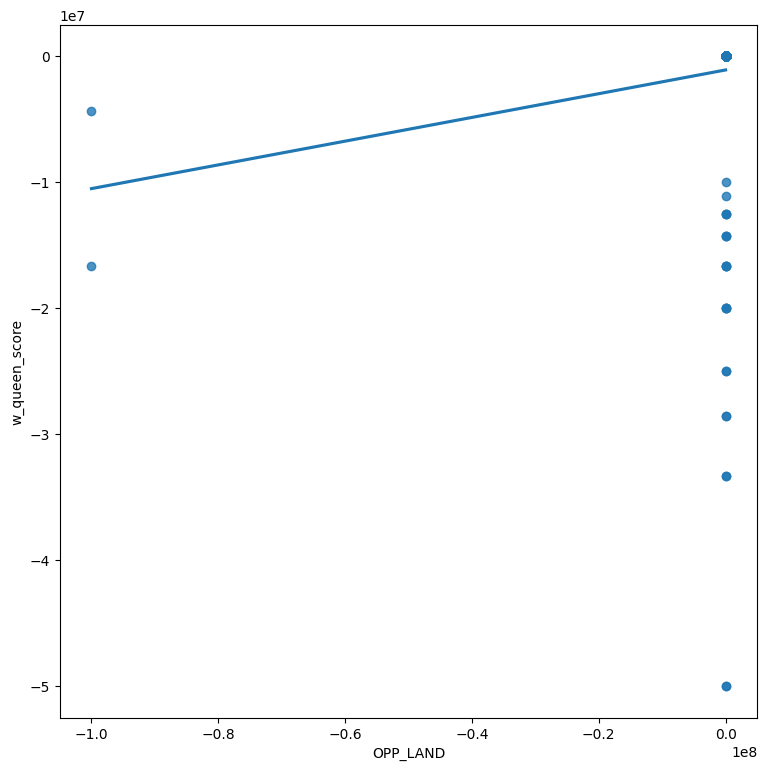

In [33]:
#Q5 continued
f, ax = plt.subplots(1, figsize=(9, 9)) # Setup the figure and axis

sns.regplot(x="OPP_LAND", y="w_queen_score", data=imd, ci=None) # Setup the figure and axis

plt.show() # Display the Moran plot

In [34]:
#Q5 continued
plt.savefig('moran_plot.png') # to save the plot as a png file

#because we used contiguity based matrix we only have values of either 1 or 0, the plot doesn't look as nice 

<Figure size 640x480 with 0 Axes>